In [7]:
%reload_ext autoreload
%autoreload 2

%matplotlib widget

from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from src.iaf import IaF, StimulusICA

In [16]:
basal_depression_ratio = 1.6
apical_depression_ratio = 1.5

sica = StimulusICA(source_fraction_variance=0.75, rate_std=10, rate_mean=20)

num_inputs = sica.num_inputs
iaf = IaF(num_inputs, basal_depression_ratio, apical_depression_ratio)

In [20]:
T = 100*1000
rate = np.zeros((T, num_inputs))
spikes = np.zeros(T)
vm = np.zeros(T)
basal_weights = np.zeros((T, iaf.num_basal))
apical_weights = np.zeros((T, iaf.num_apical))

for t in tqdm(range(T)):
    rate[t] = sica.step()[0]
    iaf.step(rate[t])
    vm[t] = iaf.vm
    spikes[t] = iaf.spike
    basal_weights[t] = iaf.basal_weights
    apical_weights[t] = iaf.apical_weights

100%|██████████| 100000/100000 [00:25<00:00, 3939.64it/s]


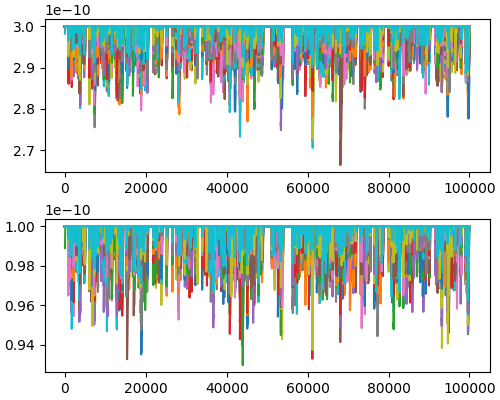

In [21]:
plt.close('all')
fig, ax=plt.subplots(2, 1, figsize=(5, 4), layout="constrained")
ax[0].plot(range(T), basal_weights)
ax[1].plot(range(T), apical_weights)
plt.show()

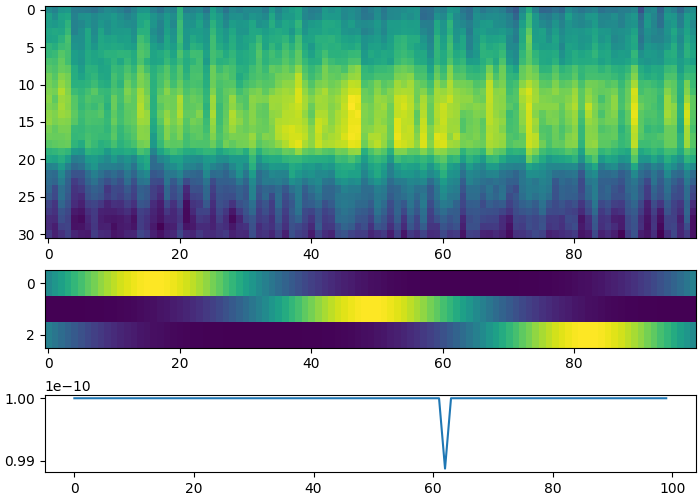

In [19]:
num_before = 20
num_after = 10
total_samples = num_before + num_after + 1
num_spikes = np.sum(spikes).astype(int)

sta = np.zeros((num_spikes, total_samples, num_inputs))
for ispike, spike_idx in enumerate(np.where(spikes)[0]):
    si = max(0, spike_idx-num_before)
    ei = min(T, spike_idx+num_after+1)
    sta[ispike] = rate[si:ei]

fig, ax = plt.subplots(3, 1, figsize=(7, 5), height_ratios=[3, 1, 1], layout="constrained")
ax[0].imshow(np.mean(sta[-1000:], axis=0), aspect="auto")
ax[1].imshow(sica.source_loading, aspect="auto")
ax[2].plot(iaf.apical_weights)
plt.show()

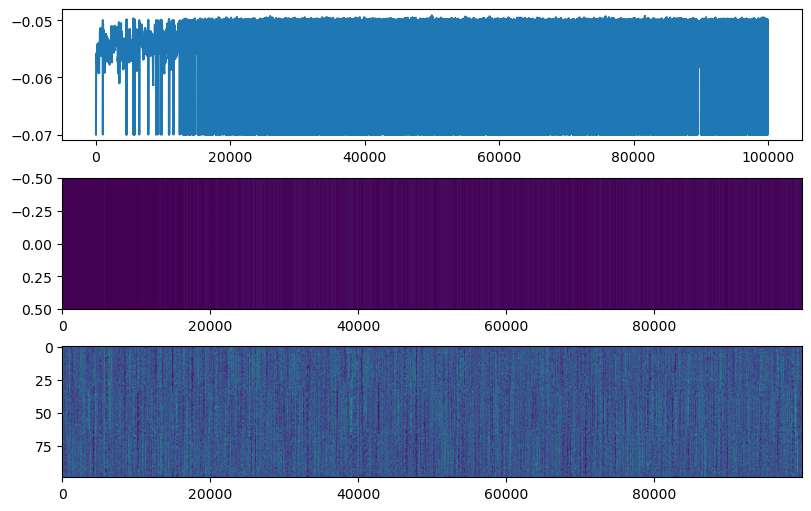

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(8, 5), layout="constrained")
ax[0].plot(vm)
ax[1].imshow(spikes.reshape(1, -1), aspect="auto")
ax[2].imshow(rate.T, aspect="auto")
plt.show()